In [39]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Image Size is (1824, 2736)


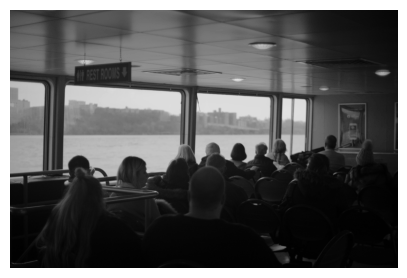

In [40]:
img0 = cv.imread('people_lowlight.jpg')
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)
print('Image Size is {}'.format(img.shape))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [41]:
img.dtype

dtype('uint8')

# Calculate Histogram (GIVEN)

In [42]:
img_flat = img.ravel()
img_flat = img_flat[img_flat < 255.0]
hist,bins = np.histogram(img_flat,256,[0,256])

<BarContainer object of 256 artists>

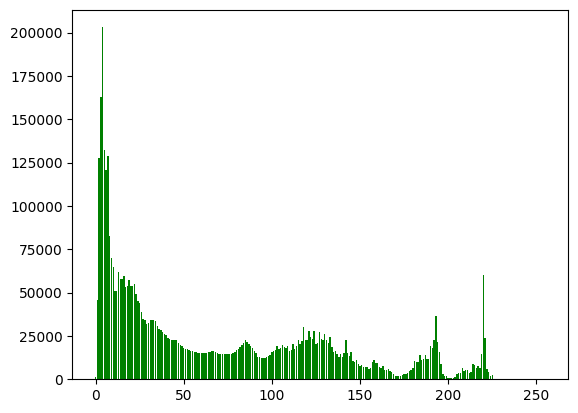

In [43]:
plt.bar(bins[:-1],hist,color='g')

In [44]:
print(bins)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [45]:
hist

array([  1397,  45918, 127629, 163008, 203026, 132166, 120895, 128519,
        82810,  69782,  65027,  50662,  50970,  62154,  57929,  57839,
        59363,  53401,  54042,  57432,  53766,  53887,  54942,  48926,
        44865,  44156,  38728,  34645,  34059,  32069,  32735,  34166,
        34246,  34073,  33514,  30621,  28954,  28422,  27222,  25952,
        25340,  24067,  23369,  22934,  22798,  22595,  22375,  20982,
        19989,  18985,  17842,  17494,  17312,  16865,  16283,  16104,
        15779,  15495,  15164,  15210,  15238,  15046,  15168,  15307,
        15546,  15596,  16335,  16113,  15764,  15032,  14691,  14458,
        14320,  14392,  14516,  14349,  14517,  14846,  14983,  15754,
        16602,  17743,  18483,  19905,  21175,  22673,  21720,  20562,
        19406,  17844,  16459,  14892,  13040,  12579,  12404,  12486,
        12463,  12992,  13198,  13944,  15816,  16396,  16662,  18911,
        17490,  17790,  19988,  18832,  17754,  18921,  16172,  16616,
      

#Q1) a) Calculate pmf of Histogram store it in 'hist_pmf'. [1 Marks]
#b) Calculate cdf of that pmf and store it in 'hist_cdf'. [1 Marks]  

The PMF of the given histogram is :  [2.79933890e-04 9.20114843e-03 2.55745758e-02 3.26638966e-02
 4.06827902e-02 2.64837097e-02 2.42252023e-02 2.57529160e-02
 1.65936474e-02 1.39830685e-02 1.30302513e-02 1.01517614e-02
 1.02134791e-02 1.24545533e-02 1.16079387e-02 1.15899043e-02
 1.18952867e-02 1.07006082e-02 1.08290532e-02 1.15083487e-02
 1.07737477e-02 1.07979939e-02 1.10093971e-02 9.80389799e-03
 8.99014601e-03 8.84807505e-03 7.76040064e-03 6.94224024e-03
 6.82481629e-03 6.42605577e-03 6.55951030e-03 6.84625718e-03
 6.86228776e-03 6.82762164e-03 6.71560801e-03 6.13590239e-03
 5.80186532e-03 5.69526200e-03 5.45480340e-03 5.20031805e-03
 5.07768416e-03 4.82259766e-03 4.68273090e-03 4.59556466e-03
 4.56831269e-03 4.52763511e-03 4.48355103e-03 4.20441867e-03
 4.00543917e-03 3.80425548e-03 3.57521866e-03 3.50548566e-03
 3.46901611e-03 3.37944528e-03 3.26282286e-03 3.22695445e-03
 3.16183024e-03 3.10492171e-03 3.03859521e-03 3.04781279e-03
 3.05342349e-03 3.01495011e-03 3.03939674e-03 3.

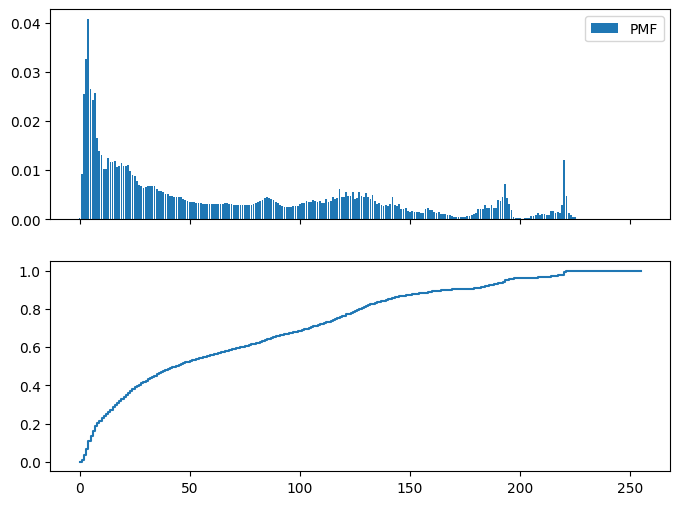

In [46]:
#Question 1)a) Calculate the pmf of the histogram and store it in 'hist_pmf'

#pmf = bin count / number of observations
hist_pmf = hist / np.sum(hist)
hist_cdf = np.cumsum(hist_pmf)
print("The PMF of the given histogram is : ", hist_pmf)
print("\n")

# Question 1)b) Calculate cdf of that pmf and store it in 'hist_cdf'
print("The CDF of the PMF above is : ", hist_cdf)

#displaying it
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize = (8,6))
ax1.bar(range(len(hist_pmf)), hist_pmf, label = 'PMF')
ax1.legend()

ax2.step(range(len(hist_cdf)), hist_cdf, where='post', label = 'cdf')
ax2.legend
plt.show()

The CDF of the PMF above is :  [2.79933890e-04 9.48108232e-03 3.50556582e-02 6.77195547e-02
 1.08402345e-01 1.34886055e-01 1.59111257e-01 1.84864173e-01
 2.01457820e-01 2.15440889e-01 2.28471140e-01 2.38622902e-01
 2.48836381e-01 2.61290934e-01 2.72898873e-01 2.84488777e-01
 2.96384064e-01 3.07084672e-01 3.17913725e-01 3.29422074e-01
 3.40195821e-01 3.50993815e-01 3.62003213e-01 3.71807111e-01
 3.80797257e-01 3.89645332e-01 3.97405732e-01 4.04347972e-01
 4.11172789e-01 4.17598845e-01 4.24158355e-01 4.31004612e-01
 4.37866900e-01 4.44694521e-01 4.51410129e-01 4.57546032e-01
 4.63347897e-01 4.69043159e-01 4.74497963e-01 4.79698281e-01
 4.84775965e-01 4.89598562e-01 4.94281293e-01 4.98876858e-01
 5.03445171e-01 5.07972806e-01 5.12456357e-01 5.16660775e-01
 5.20666215e-01 5.24470470e-01 5.28045689e-01 5.31551174e-01
 5.35020191e-01 5.38399636e-01 5.41662459e-01 5.44889413e-01
 5.48051243e-01 5.51156165e-01 5.54194760e-01 5.57242573e-01
 5.60295997e-01 5.63310947e-01 5.66350343e-01 5.694175

<function matplotlib.pyplot.show(close=None, block=None)>

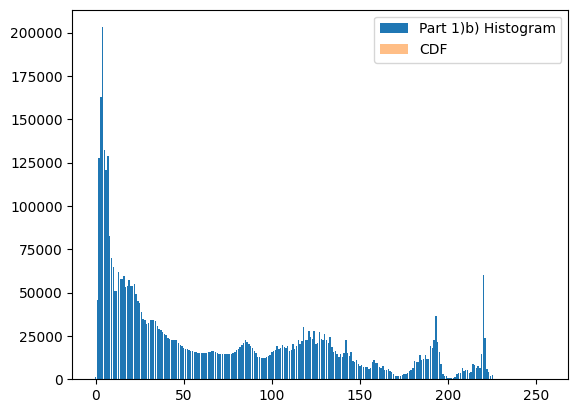

In [47]:
# Question 1)b) Calculate cdf of that pmf and store it in 'hist_cdf'

print("The CDF of the PMF above is : ", hist_cdf)

#displaying it
plt.bar(range(len(hist)), hist, label = 'Part 1)b) Histogram')
plt.bar(range(len(hist)), hist_cdf, alpha = 0.5, label='CDF')
plt.legend()
plt.show

#Q2) Calculate $T(r)$ [3 Marks]

In [48]:
# Question 2) Calculate the T(r) for the above question
tr = hist_cdf*255
print("The T(r) for the above is :  ", tr)

The T(r) for the above is :   [7.13831419e-02 2.41767599e+00 8.93919283e+00 1.72684865e+01
 2.76425980e+01 3.43959439e+01 4.05733705e+01 4.71403641e+01
 5.13717442e+01 5.49374267e+01 5.82601407e+01 6.08488399e+01
 6.34532771e+01 6.66291882e+01 6.95892125e+01 7.25446381e+01
 7.55779362e+01 7.83065913e+01 8.10679999e+01 8.40026288e+01
 8.67499345e+01 8.95034229e+01 9.23108192e+01 9.48108132e+01
 9.71033004e+01 9.93595596e+01 1.01338462e+02 1.03108733e+02
 1.04849061e+02 1.06487705e+02 1.08160380e+02 1.09906176e+02
 1.11656059e+02 1.13397103e+02 1.15109583e+02 1.16674238e+02
 1.18153714e+02 1.19606006e+02 1.20996980e+02 1.22323062e+02
 1.23617871e+02 1.24847633e+02 1.26041730e+02 1.27213599e+02
 1.28378519e+02 1.29533065e+02 1.30676371e+02 1.31748498e+02
 1.32769885e+02 1.33739970e+02 1.34651651e+02 1.35545549e+02
 1.36430149e+02 1.37291907e+02 1.38123927e+02 1.38946800e+02
 1.39753067e+02 1.40544822e+02 1.41319664e+02 1.42096856e+02
 1.42875479e+02 1.43644291e+02 1.44419338e+02 1.4520148

#Q3) Apply $T(r)$ on input image. [2 Marks]
#Store output image in 'out_img1'

#Show input image and output images.

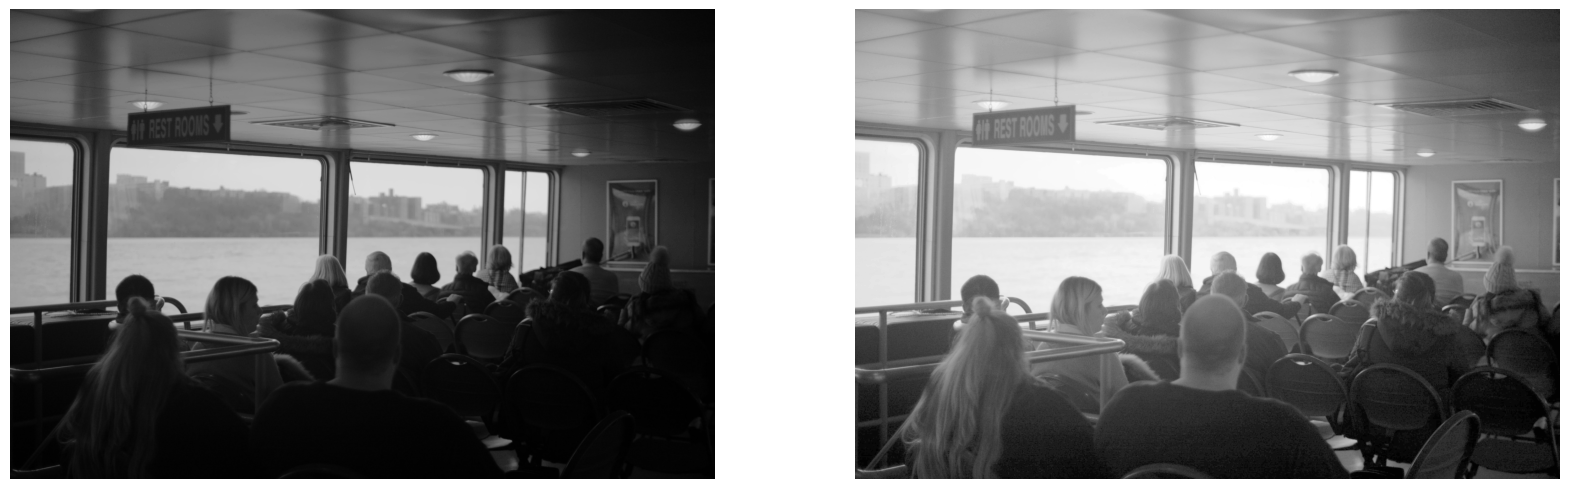

In [49]:
#function to inverse the image
def inverse_cdf(image):
    return np.interp(image.flatten(), bins[:-1], 255 * hist_cdf).reshape(image.shape)


#storing output image in 'out_img1' as instructed
out_img1=inverse_cdf(img);


#displaying the transformation
plt.figure(figsize=(20,20))

#original image
plt.subplot(121)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

#transformed image
plt.subplot(122)
plt.imshow(out_img1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#Show output image histogram

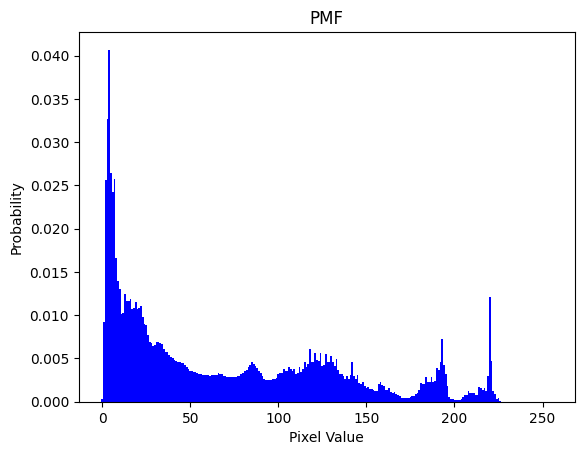

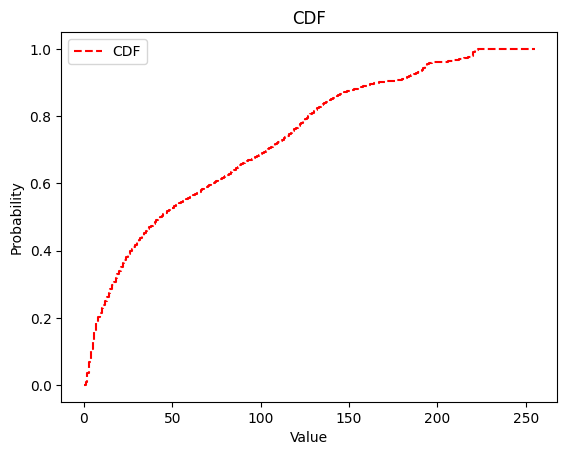

In [50]:

#output image histogram (PMF)
plt.bar(bins[:-1], hist_pmf, width=1.0,color='b', label='Histogram')
plt.ylabel('Probability')
plt.xlabel('Pixel Value')
plt.title('PMF')
plt.show()

#output image histogram (CDF)
plt.step(bins[:-1], hist_cdf, where='post', linestyle='--', color='r', label='CDF')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('CDF')
plt.show()

<BarContainer object of 256 artists>

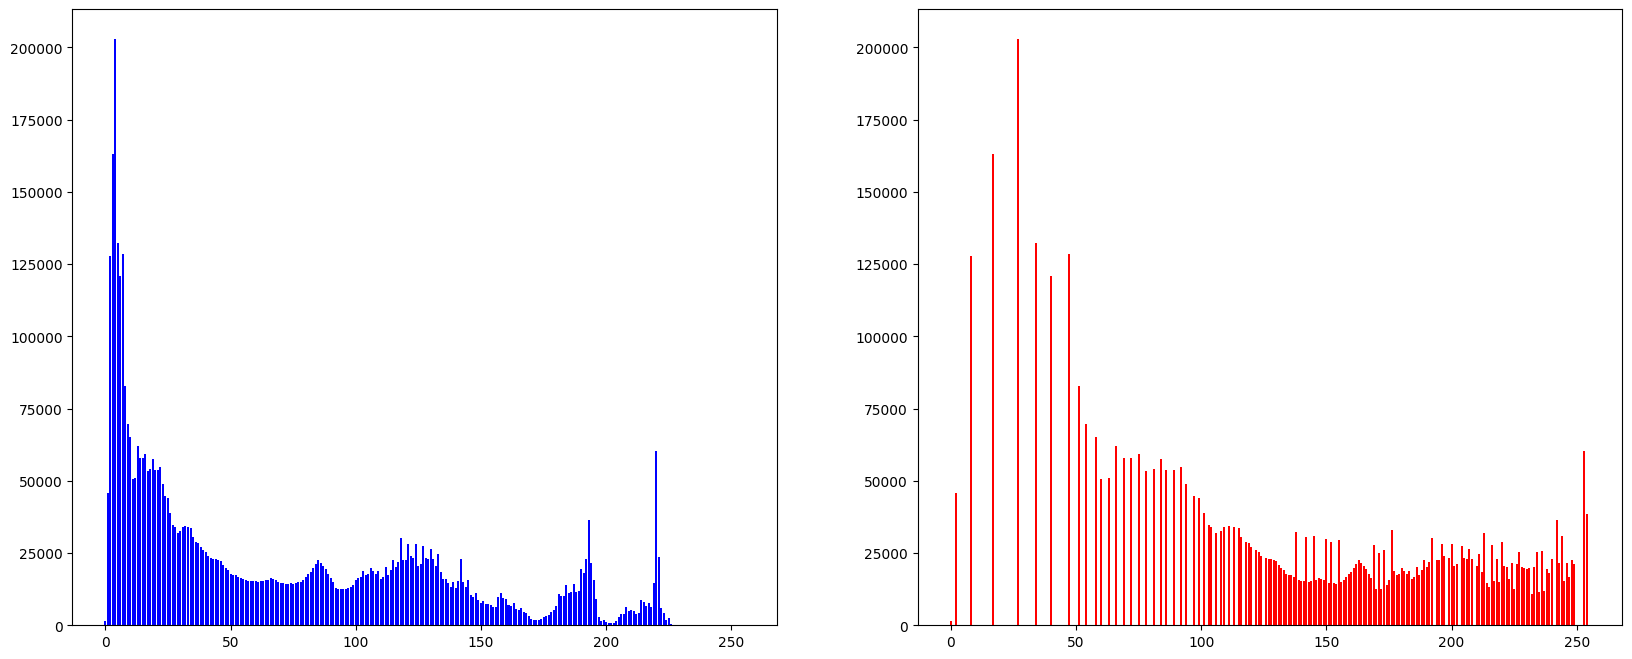

In [51]:
out_img_flat = out_img1.ravel()
# img_flat = img_flat[img_flat < 255.0]
hist1,bins1 = np.histogram(out_img_flat,256,[0,256])
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.bar(bins[:-1],hist,color='b')
plt.subplot(122)
plt.bar(bins1[:-1],hist1,color='r')

#Built in Histogram Equalization output by opencv.

In [52]:
out_img2 = cv.equalizeHist(img)

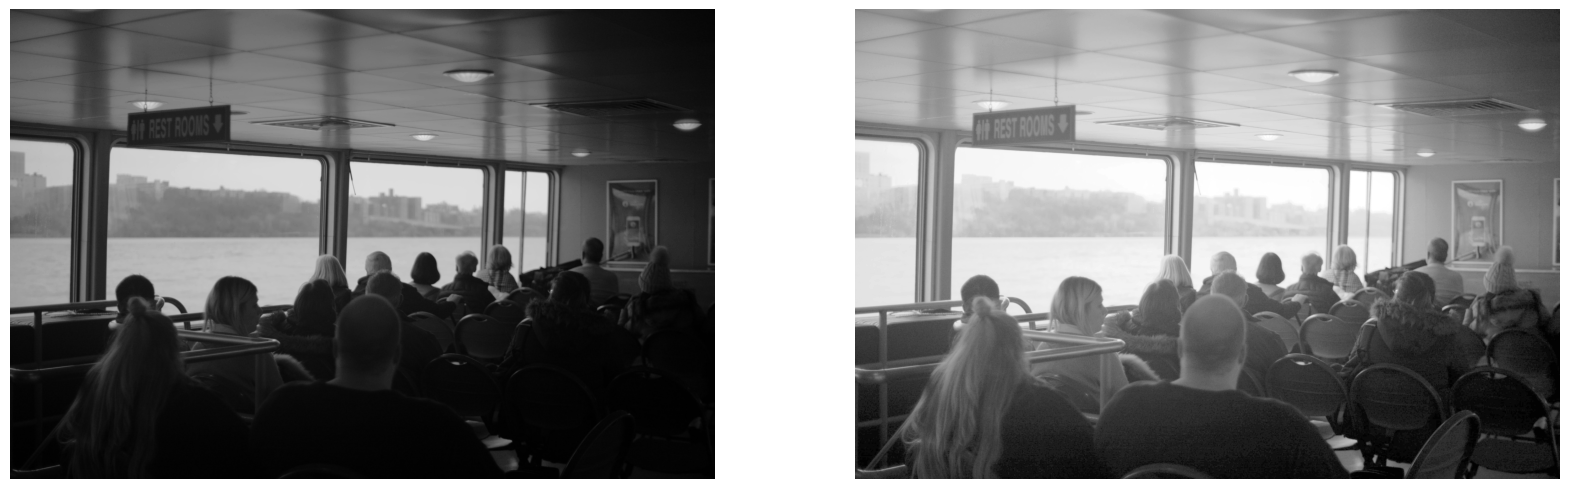

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(out_img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

<BarContainer object of 256 artists>

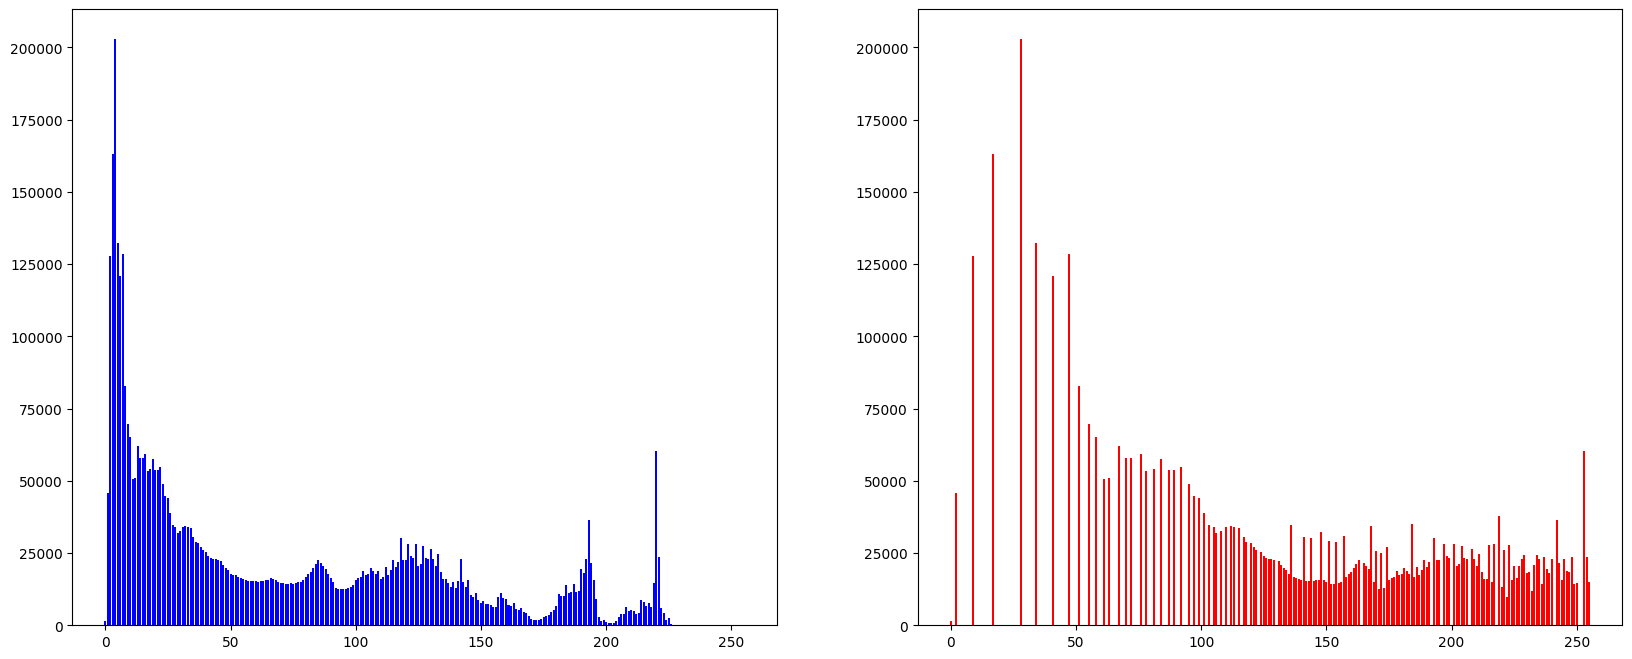

In [54]:
out_img_flat2 = out_img2.ravel()
# img_flat = img_flat[img_flat < 255.0]
hist2,bins2 = np.histogram(out_img_flat2,256,[0,256])
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.bar(bins[:-1],hist,color='b')
plt.subplot(122)
plt.bar(bins2[:-1],hist2,color='r')

# Histogram Matching Problem

In [55]:
ref0 = cv.imread('penstand_bright.jpg')
ref = cv.cvtColor(ref0, cv.COLOR_BGR2GRAY)
inp0 = cv.imread('penstand_lowlight2.jpg')
inp = cv.cvtColor(inp0, cv.COLOR_BGR2GRAY)

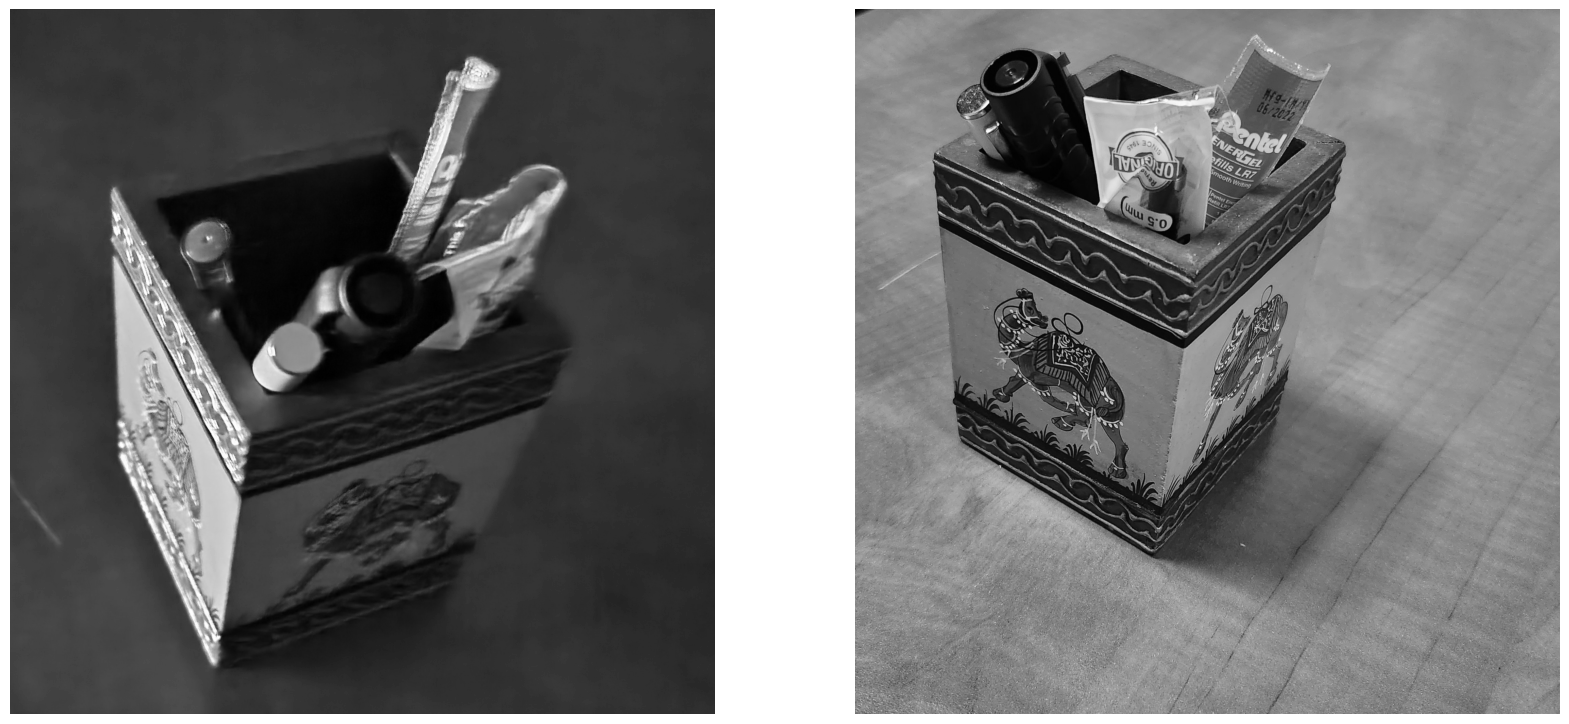

In [56]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(inp, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(ref, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

<BarContainer object of 256 artists>

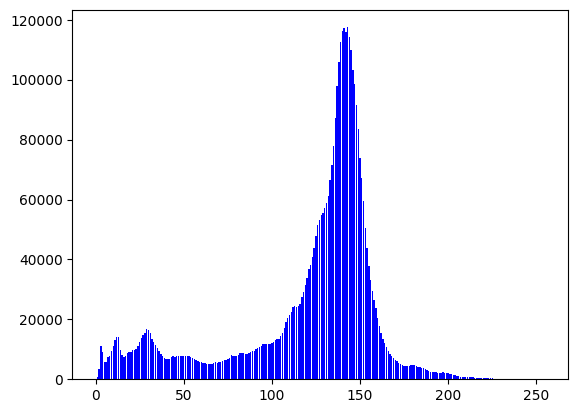

In [57]:
ref_flat = ref.ravel()
hist_ref,bins_ref = np.histogram(ref_flat,256,[0,256])
plt.bar(bins_ref[:-1],hist_ref,color='b')

<BarContainer object of 256 artists>

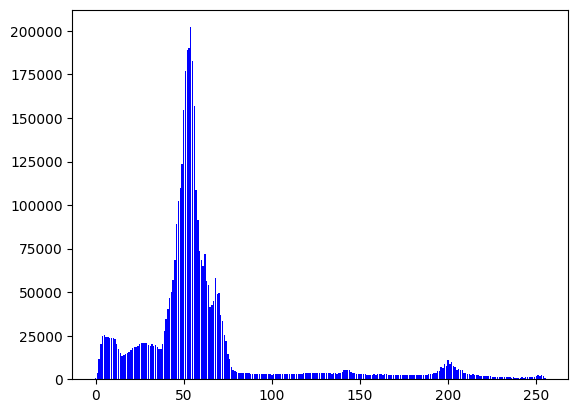

In [58]:
inp_flat = inp.ravel()
hist_inp,bins_inp = np.histogram(inp_flat,256,[0,256])
plt.bar(bins_inp[:-1],hist_inp,color='b')

#Q4) Implement Histogram matching by CDF based transformation function. [3 Marks]

#Plot both images side by side

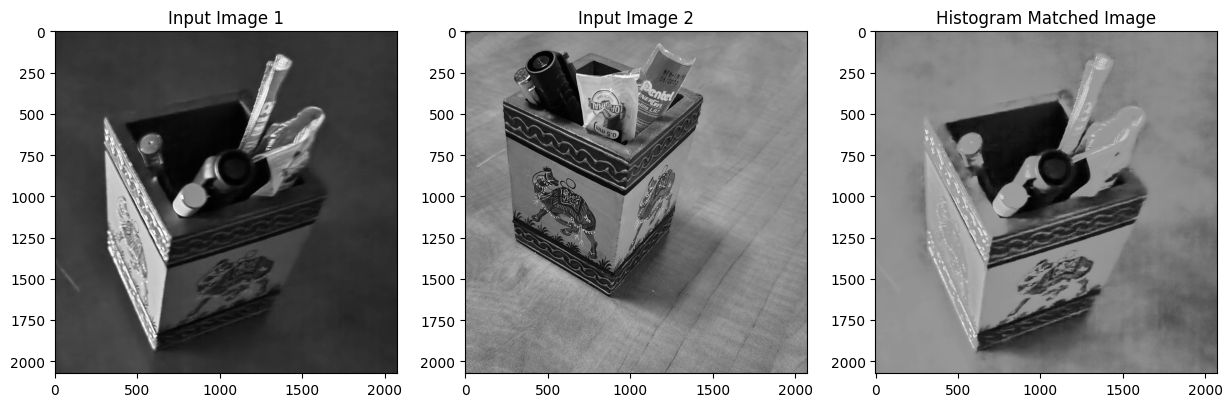

In [59]:
#function for histogram matching

def histogram_matching(img, target_cdf):
  #fn def start
    img_flat = img.ravel()
    input_cdf = np.cumsum(np.histogram(img_flat, bins=256, range=(0, 256), density=True)[0])

    transformed_values = np.interp(input_cdf, target_cdf, np.arange(256))
    matched_img_flat = np.interp(img_flat, np.arange(256), transformed_values)
    out_img3 = matched_img_flat.reshape(img.shape)

    return out_img3
  #fn def end

#
img1 = inp;
img2 = ref;
target_img_flat = img2.ravel()
target_cdf = np.cumsum(np.histogram(target_img_flat, bins=256, range=(0, 256), density=True)[0])
out_img3 = histogram_matching(img1, target_cdf)


#displaying it
plt.figure(figsize=(15, 5))

#first image
plt.subplot(131)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image 1')

#second image
plt.subplot(132)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image 2')

#matched image tbd after histogram matching
plt.subplot(133)
plt.imshow(out_img3, cmap='gray', vmin=0, vmax=255)
plt.title('Histogram Matched Image')

plt.show()


<BarContainer object of 256 artists>

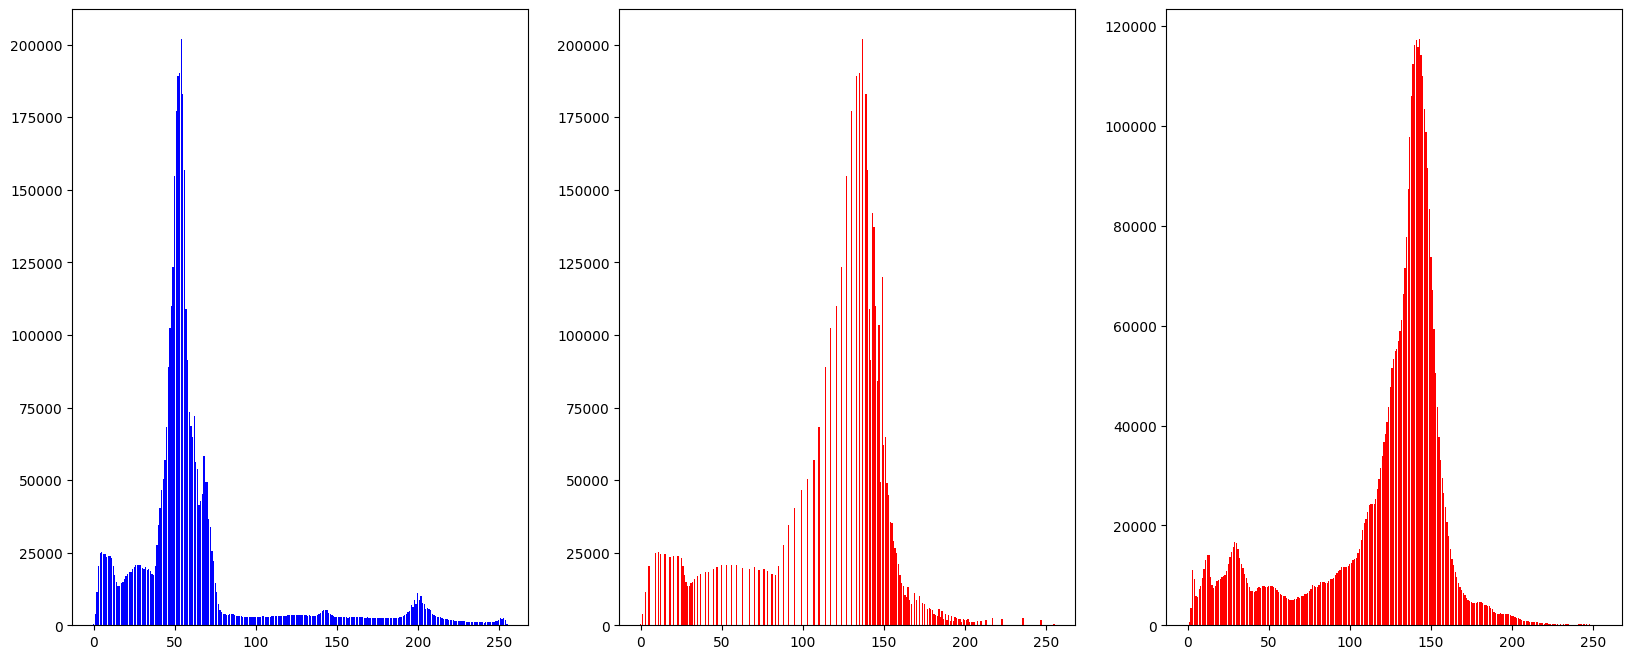

In [60]:
out_img_flat3 = out_img3.ravel()
# img_flat = img_flat[img_flat < 255.0]
hist3,bins3 = np.histogram(out_img_flat3,256,[0,256])
plt.figure(figsize=(20,8))
plt.subplot(131)
plt.bar(bins_inp[:-1],hist_inp,color='b')
plt.subplot(132)
plt.bar(bins3[:-1],hist3,color='r')
plt.subplot(133)
plt.bar(bins_ref[:-1],hist_ref,color='r')

# Verification with 'match_histogram' function in skimage.exposure

In [61]:
from skimage.exposure import match_histograms

In [62]:
matched = match_histograms(inp, ref)

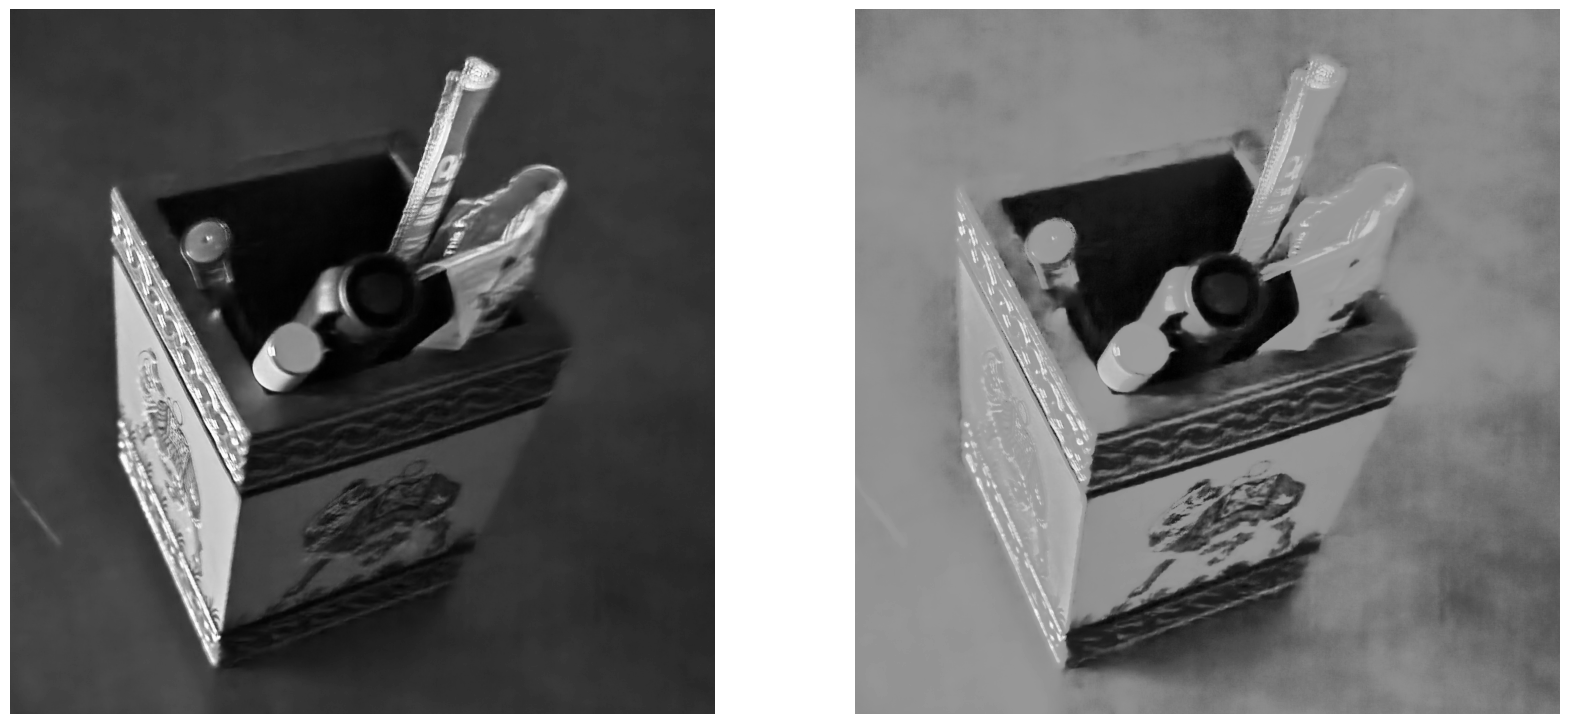

In [63]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(inp, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.imshow(matched, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

<BarContainer object of 256 artists>

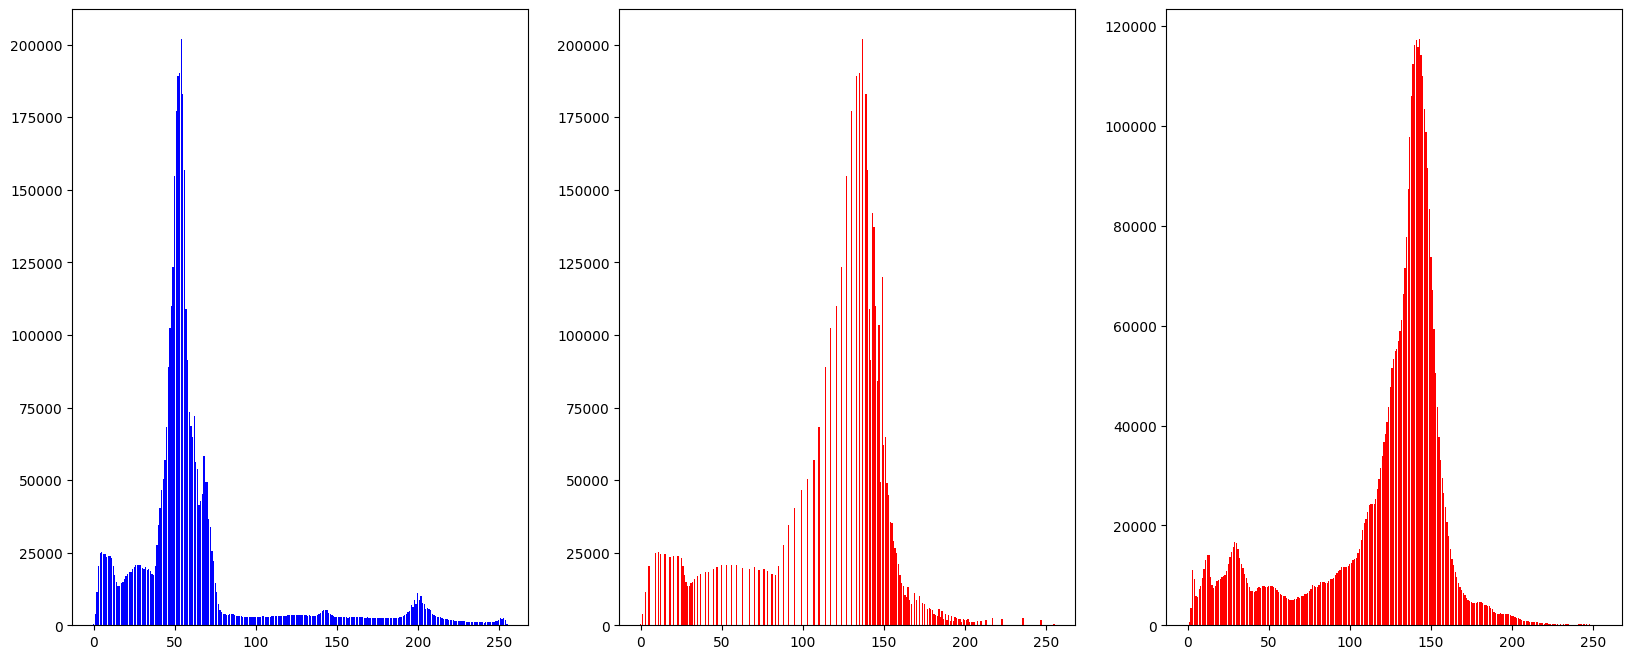

In [64]:
out_img_flat4 = matched.ravel()
# img_flat = img_flat[img_flat < 255.0]
hist4,bins4 = np.histogram(out_img_flat4,256,[0,256])
plt.figure(figsize=(20,8))
plt.subplot(131)
plt.bar(bins_inp[:-1],hist_inp,color='b')
plt.subplot(132)
plt.bar(bins4[:-1],hist4,color='r')
plt.subplot(133)
plt.bar(bins_ref[:-1],hist_ref,color='r')